# Numpy cheatsheet
## ECO 586 : Phenomenology and modeling of financial markets

### José Moran, Michael Benzaquen


This course supposes basic familiarity with the `Python` programming language. We will work with `Python 3` and `Jupyter` notebooks, which are now commonplace among data scientists and researchers. A notebook is a collection of cells that can contain either code or `Markdown` text (as in this cell). Figures and animations can also be shown on notebooks. 


The goal of this notebook is to present you with the numerical tools needed for the course. Here we will focus on a library called `Pandas` that is broadly used in data science, tech and finance. 

This notebook draws heavily on the Pandas introduction in the [QuantEcon courses](https://quantecon.org/lectures/) by Thomas Sargent and John Stachuski. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

## The first basic object : `pd.Series`


Two important data types defined by `pandas` are `Series` and `DataFrame`.

You can think of a `Series` as a “column” of data, such as a collection of observations on a single variable.

A `DataFrame` is an object for storing related columns of data.

In [2]:
s = pd.Series(np.random.randn(4), name='daily returns')
print(s)

0    0.028035
1    2.080450
2   -0.805613
3    0.714900
Name: daily returns, dtype: float64


Pandas `Series` are built on top of NumPy arrays and support many similar operations. 

See the NumPy Cheatsheet for more details.

In [3]:
print(s*100)

0      2.803531
1    208.045032
2    -80.561281
3     71.489997
Name: daily returns, dtype: float64


An interesting thing to do to get a glimpse of the data is to use the `Series.describe()` method, e.g. 

In [4]:
s.describe()

count    4.000000
mean     0.504443
std      1.220833
min     -0.805613
25%     -0.180377
50%      0.371468
75%      1.056288
max      2.080450
Name: daily returns, dtype: float64

The advantage with respect to `numpy` arrays is that they provide flexible indexing. Datetime functionalities are also well integrated.

In [5]:
x = pd.Series(np.cumsum(np.random.randn(100)), index = pd.date_range(start = '01-01-2019', freq = 'D', periods = 100))
## Generate a Series containing a brownian motion. The index is given by a Datetime index starting on Jan. 1st 2019 with 100 days
## The sampling frequency is daily

Series can also be plotted using the `Series.plot()` method. If nothing is passed to the argument then the index is used for the x-axis.

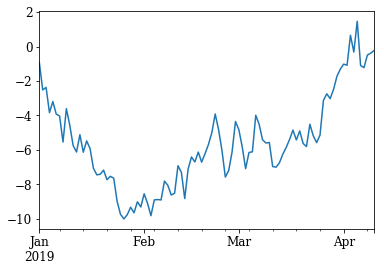

In [6]:
x.plot()

## DataFrames

`DataFrames` are basically a collection of `Pandas` series. Let's create a synthetic `DataFrame` containing fictive market capitalizations for Google and Apple sampled with hourly frequency. We will take a yearly trend of 2% and a volatility of 6% for Google and a trend of 5% and a volatility of 5% for Apple. We have to scale these down to business hour units (instead of yearly units).

Modeling them as a geometric brownian motion implies
$$\log(x(t)) = \log(x(0)) + mt + \sigma_x \xi(t)$$

where $\xi$ is a standard brownian motion.

In [7]:
T = 261 * 8
m_g = 2e-2 / (261 * 8) #261 business days in a year, 8 hours in business day
sigma_g = 8e-2 / np.sqrt(261 * 8)
log_G = np.zeros(T)
log_G[0] = np.log(1234) #fictive number
log_G[1:] = log_G[0] + m_g * np.arange(1,T) + sigma_g * np.cumsum(np.random.randn(T-1))
G = np.exp(log_G)

m_a = 5e-2 / (261 * 8) 
sigma_a = 10e-2 / np.sqrt(261 * 8)
log_A = np.zeros(T)
log_A[0] = np.log(900) #fictive number
log_A[1:] = log_A[0] + m_a *10 * np.arange(1,T) + sigma_a * np.cumsum(np.random.randn(T-1))
A = np.exp(log_A)

We now create the dataframe, supposing that the market-cap we simulated has hourly frequency starting on Jan. 1st 2019.
For this, we will pass a dictionnary as an argument to the `pd.DataFrame` constructor. Other ways to create `DataFrame`s exist, but we will not cover them.

In [8]:
df = pd.DataFrame({'GOOGL':G, 'AAPL':A}, index = pd.bdate_range(start = '01-01-2019', freq = 'BH', periods= T))
#bdate_range is used for business days, BH stands for business hours from 9 am to 4pm

Let's get a quick look at our `DataFrame` and show the first 12 lines.

In [9]:
df.head(12)

GOOGL        AAPL
2019-01-01 09:00:00  1234.000000  900.000000
2019-01-01 10:00:00  1236.496335  900.148654
2019-01-01 11:00:00  1236.933991  895.644843
2019-01-01 12:00:00  1234.552741  897.005041
2019-01-01 13:00:00  1233.907338  897.020210
2019-01-01 14:00:00  1230.501241  897.333359
2019-01-01 15:00:00  1235.015272  897.722896
2019-01-01 16:00:00  1236.154811  896.468346
2019-01-02 09:00:00  1237.665774  892.271002
2019-01-02 10:00:00  1238.046618  894.587198
2019-01-02 11:00:00  1240.772217  897.178807
2019-01-02 12:00:00  1241.277633  895.856887

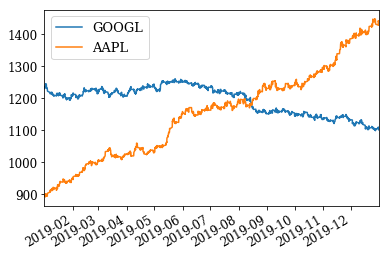

In [10]:
df.plot()

Suppose we only want to see the Apple stock, plotted in log-scale,

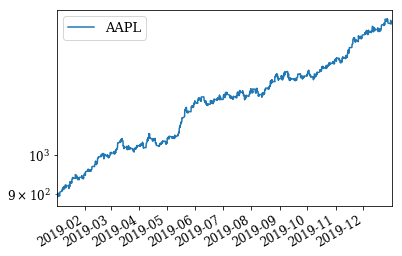

In [11]:
df.plot(y='AAPL', logy=True)

## Accessing data in a DataFrame


Basically to access data in a `DataFrame` you need to pass indices or columns to it. However since indices are quite flexible and can be anything from `pd.DateTime` objects to strings some dicussion must be had on how to access them.
### columns,loc and iloc

* column : to get columns in a DataSeries, you can just use `df[column]` to get a series (lists of columns can also be passed) e.g. 



In [12]:
df['AAPL']

2019-01-01 09:00:00     900.000000
2019-01-01 10:00:00     900.148654
2019-01-01 11:00:00     895.644843
2019-01-01 12:00:00     897.005041
2019-01-01 13:00:00     897.020210
                          ...     
2019-12-31 12:00:00    1428.784932
2019-12-31 13:00:00    1431.867947
2019-12-31 14:00:00    1430.583412
2019-12-31 15:00:00    1432.482263
2019-12-31 16:00:00    1433.144312
Freq: BH, Name: AAPL, Length: 2088, dtype: float64

* loc : this method lets you access data by passing an index value. Indices are quite flexible, and for example if you have a DateTime index then you can pass anything that looks like a time as an argument. For example, let's select the month of January,

In [13]:
df.loc['Jan 2019']

GOOGL        AAPL
2019-01-01 09:00:00  1234.000000  900.000000
2019-01-01 10:00:00  1236.496335  900.148654
2019-01-01 11:00:00  1236.933991  895.644843
2019-01-01 12:00:00  1234.552741  897.005041
2019-01-01 13:00:00  1233.907338  897.020210
...                          ...         ...
2019-01-31 12:00:00  1207.394539  950.400265
2019-01-31 13:00:00  1207.224702  950.061361
2019-01-31 14:00:00  1206.888559  950.518223
2019-01-31 15:00:00  1206.297679  950.978346
2019-01-31 16:00:00  1210.236106  948.596948

[184 rows x 2 columns]

If you want to select just one column, then you can pass it as the second argument to the `loc` method, and you will retrieve a series.

In [14]:
df.loc['Jan 2019', 'GOOGL']

2019-01-01 09:00:00    1234.000000
2019-01-01 10:00:00    1236.496335
2019-01-01 11:00:00    1236.933991
2019-01-01 12:00:00    1234.552741
2019-01-01 13:00:00    1233.907338
                          ...     
2019-01-31 12:00:00    1207.394539
2019-01-31 13:00:00    1207.224702
2019-01-31 14:00:00    1206.888559
2019-01-31 15:00:00    1206.297679
2019-01-31 16:00:00    1210.236106
Freq: BH, Name: GOOGL, Length: 184, dtype: float64

* iloc : on the other hand, iloc allows you to access by **row**. For instance, `df.iloc[5]` gets you the fifth row. 

In [15]:
df.iloc[5]

GOOGL    1230.501241
AAPL      897.333359
Name: 2019-01-01 14:00:00, dtype: float64

### Accessing with conditions

Using `loc` also allows one to pass Pandas Series with Boolean values as one would to a numpy array. Let's select for instance the part of the `DataFrame` where GOOGL had a market cap above 1200.

In [16]:
df.loc[df.GOOGL > 1200]  # df.GOOGL is the same as df['GOOGL']

GOOGL         AAPL
2019-01-01 09:00:00  1234.000000   900.000000
2019-01-01 10:00:00  1236.496335   900.148654
2019-01-01 11:00:00  1236.933991   895.644843
2019-01-01 12:00:00  1234.552741   897.005041
2019-01-01 13:00:00  1233.907338   897.020210
...                          ...          ...
2019-08-08 12:00:00  1209.691963  1175.921207
2019-08-08 13:00:00  1206.494938  1176.572351
2019-08-08 14:00:00  1205.328235  1174.247281
2019-08-08 15:00:00  1200.900540  1173.856710
2019-08-13 10:00:00  1202.883734  1179.920666

[1244 rows x 2 columns]

Let's select only mondays now. 

In [17]:
df.loc[df.index.dayofweek == 0]

GOOGL         AAPL
2019-01-07 09:00:00  1218.446618   907.063199
2019-01-07 10:00:00  1217.888160   909.966169
2019-01-07 11:00:00  1217.411311   909.417343
2019-01-07 12:00:00  1216.007721   907.953996
2019-01-07 13:00:00  1214.638743   907.592088
...                          ...          ...
2019-12-30 12:00:00  1108.511579  1432.902596
2019-12-30 13:00:00  1105.993680  1434.924873
2019-12-30 14:00:00  1108.874734  1438.858124
2019-12-30 15:00:00  1106.414926  1442.631864
2019-12-30 16:00:00  1103.849900  1440.838677

[416 rows x 2 columns]

In [18]:
df.shift(periods = 2)

GOOGL         AAPL
2019-01-01 09:00:00          NaN          NaN
2019-01-01 10:00:00          NaN          NaN
2019-01-01 11:00:00  1234.000000   900.000000
2019-01-01 12:00:00  1236.496335   900.148654
2019-01-01 13:00:00  1236.933991   895.644843
...                          ...          ...
2019-12-31 12:00:00  1103.992170  1437.888493
2019-12-31 13:00:00  1100.693589  1433.725048
2019-12-31 14:00:00  1101.387122  1428.784932
2019-12-31 15:00:00  1105.999519  1431.867947
2019-12-31 16:00:00  1106.673344  1430.583412

[2088 rows x 2 columns]

### Using `df.diff()` and `df.shift()`

These are useful functions, essentially, `df.shift(periods = k)[row,column] = df[row - k, column]`, and similarly
`df.diff(periods=k) = df - df.shift(periods = k)`.
For example,

In [19]:
df.shift(1).head(5)

GOOGL        AAPL
2019-01-01 09:00:00          NaN         NaN
2019-01-01 10:00:00  1234.000000  900.000000
2019-01-01 11:00:00  1236.496335  900.148654
2019-01-01 12:00:00  1236.933991  895.644843
2019-01-01 13:00:00  1234.552741  897.005041

In [20]:
df.head(5)

GOOGL        AAPL
2019-01-01 09:00:00  1234.000000  900.000000
2019-01-01 10:00:00  1236.496335  900.148654
2019-01-01 11:00:00  1236.933991  895.644843
2019-01-01 12:00:00  1234.552741  897.005041
2019-01-01 13:00:00  1233.907338  897.020210

### A practical example : computing log-returns

We define the log-returns as $r(t) = \log(x(t)/x(t-1))$  where $x$ is the market-cap. 

To compute them, we will first apply the `np.log` function and then use `diff()`. Two methods are possible:

In [21]:
returns = np.log(df).diff()
returns.head()


GOOGL      AAPL
2019-01-01 09:00:00       NaN       NaN
2019-01-01 10:00:00  0.002021  0.000165
2019-01-01 11:00:00  0.000354 -0.005016
2019-01-01 12:00:00 -0.001927  0.001518
2019-01-01 13:00:00 -0.000523  0.000017

Notice that the column names haven't changed.

In [22]:
returns.rename(columns={'GOOGL':'GOOGL_returns', 'AAPL':'AAPL_returns'}, inplace=True)  #the inplace keyword applies the function to the DataFrame,
                                                                                        # instead of just showing a view
returns.head()

GOOGL_returns  AAPL_returns
2019-01-01 09:00:00            NaN           NaN
2019-01-01 10:00:00       0.002021      0.000165
2019-01-01 11:00:00       0.000354     -0.005016
2019-01-01 12:00:00      -0.001927      0.001518
2019-01-01 13:00:00      -0.000523      0.000017

An alternative way is to use apply,

In [23]:
returns = df.apply(lambda x : np.log(x).diff()).rename(columns={'GOOGL':'GOOGL_returns', 'AAPL':'AAPL_returns'})
returns.head()

GOOGL_returns  AAPL_returns
2019-01-01 09:00:00            NaN           NaN
2019-01-01 10:00:00       0.002021      0.000165
2019-01-01 11:00:00       0.000354     -0.005016
2019-01-01 12:00:00      -0.001927      0.001518
2019-01-01 13:00:00      -0.000523      0.000017

We can check that the returns are gaussian,

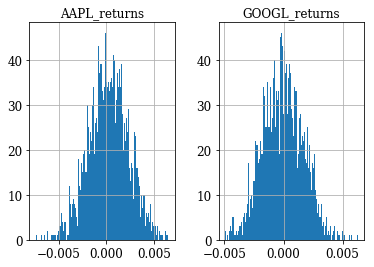

In [24]:
returns.hist(bins = 150);

### Using `df.groupby()`

A `groupby` allows one to split a `DataFrame` into groups and conduct operations within each group. The object passed as an argument must be of the same length as the DataFrame. But we can also groupby on a column.

For instance, let's compute the mean of the returns on each weekday,

In [25]:
returns.groupby(returns.index.day_name() ).mean()

GOOGL_returns  AAPL_returns
Friday         -0.000022      0.000374
Monday         -0.000148      0.000242
Thursday       -0.000007      0.000128
Tuesday        -0.000007      0.000279
Wednesday      -0.000071      0.000090

We can also create a column for the day of week and groupby that column. We'll get the std of the returns of each day, as

In [26]:
returns['DofWeek'] = returns.index.day_name()
returns.head()

GOOGL_returns  AAPL_returns  DofWeek
2019-01-01 09:00:00            NaN           NaN  Tuesday
2019-01-01 10:00:00       0.002021      0.000165  Tuesday
2019-01-01 11:00:00       0.000354     -0.005016  Tuesday
2019-01-01 12:00:00      -0.001927      0.001518  Tuesday
2019-01-01 13:00:00      -0.000523      0.000017  Tuesday

In [27]:
returns.groupby('DofWeek').std()

GOOGL_returns  AAPL_returns
DofWeek                               
Friday          0.001775      0.002154
Monday          0.001636      0.002154
Thursday        0.001722      0.002141
Tuesday         0.001699      0.002081
Wednesday       0.001681      0.002076

...nothing shocking, but this is synthetic data. Real data has intra-weekly seasonalities.

## Computing correlation functions

We compute the correlation function of the log-returns $C(T)=\langle x(t)x(t+T)\rangle$, where $x$ are the log returns.

We now define a function that computes the correlation function, and compute it for points $T=(0,1,...,100)$,

In [28]:
def correlation_function(x,T):
    return (x*x.shift(-T)).mean()

Ts = np.arange(100)
C_aapl = np.array([correlation_function(returns['AAPL_returns'],T) for T in Ts])
C_googl = np.array([correlation_function(returns['GOOGL_returns'], T) for T in Ts])

Text(0.5,0,'Lag T (hours)')

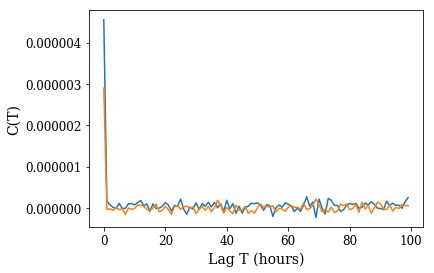

In [29]:
plt.plot(Ts, C_aapl, label='AAPL')
plt.plot(Ts, C_googl, label='GOOGL')
plt.ylabel('C(T)')
plt.xlabel('Lag T (hours)')

A way to do this to avoid comprehension lists is to use the `np.vectorize` function and apply it to the function you want to vectorize, but you need to create a specific function for each column.

In [30]:
#create a function to evaluate corr. function at a time T
#the vectorized function takes a numpy array as argument for T
#and returns an array where the function is evaluated for
#each value in the argument array
corr_function_apple = np.vectorize(lambda T: correlation_function(returns['AAPL_returns'], T))  

#apply it directly to an array
C_aapl = corr_function_apple(Ts)

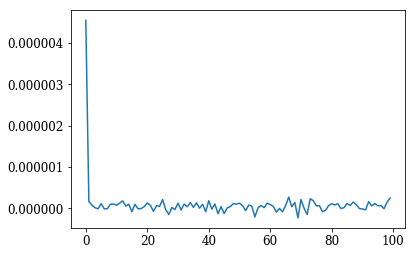

In [31]:
plt.plot(Ts, C_aapl)

... as expected, returns are decorrelated here.

We can also compute the variogram $V(\tau) = \langle (x(t+\tau)-x(t))^2\rangle$ of a time series. Let's do this on a synthetic brownian motion, where we should find $V(\tau)\propto \tau$.

In [32]:
dummy_df = pd.DataFrame({'x': np.cumsum(np.random.randn(int(1e4)))})

In [33]:
## We define a function that takes as an argument a column and an array of Ts and returns the variogram evaluated at those points

def compute_variogram(x, Ts):
    vectorized_variogram = np.vectorize(lambda T : ((x-x.shift(-T))**2).mean()) #define a specific function for x here
    return vectorized_variogram(Ts)
    

We will compute the variogram for $T=(0,1,10,100,500,1000)$.

In [34]:
Ts = np.array([0,1,10,100,500,1000])

dummy_variogram = compute_variogram(dummy_df['x'], Ts)


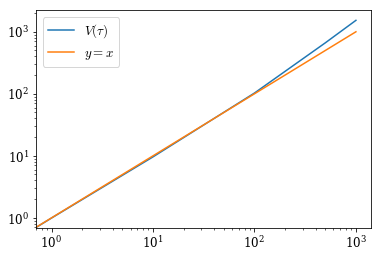

In [35]:
plt.plot(Ts, dummy_variogram, label=r'$V(\tau)$')
plt.plot(Ts, Ts, label='$y=x$')
plt.yscale('log')
plt.xscale('log')
plt.legend()